# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

total_data.drop(columns = ["id"], inplace = True)
total_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
# Obtener las dimensiones
total_data.shape

(48895, 15)

In [3]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

Se puede observar arriba que algunas columnas contienen valores NaN, siendo "last_review" y "reviews_per_month" las que más.

Asimismo, nos informa de lo siguiente:
- Hay 8 características categóricas (id, name,
host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365).

- Y 8 características numéricas (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count).

In [4]:
#Contar el número de duplicados

print(f"El número total de repetidos en la columna Name es: {total_data['name'].duplicated().sum()}")
print(f"El número total de repetidos en la columna Host_id es: {total_data['host_id'].duplicated().sum()}")

El número total de repetidos en la columna Name es: 989
El número total de repetidos en la columna Host_id es: 11438


In [5]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(48895, 15)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Eliminar información irrelevante

total_data.drop(["name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


/tmp/ipykernel_1867/399394351.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=45)
/tmp/ipykernel_1867/399394351.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=45)


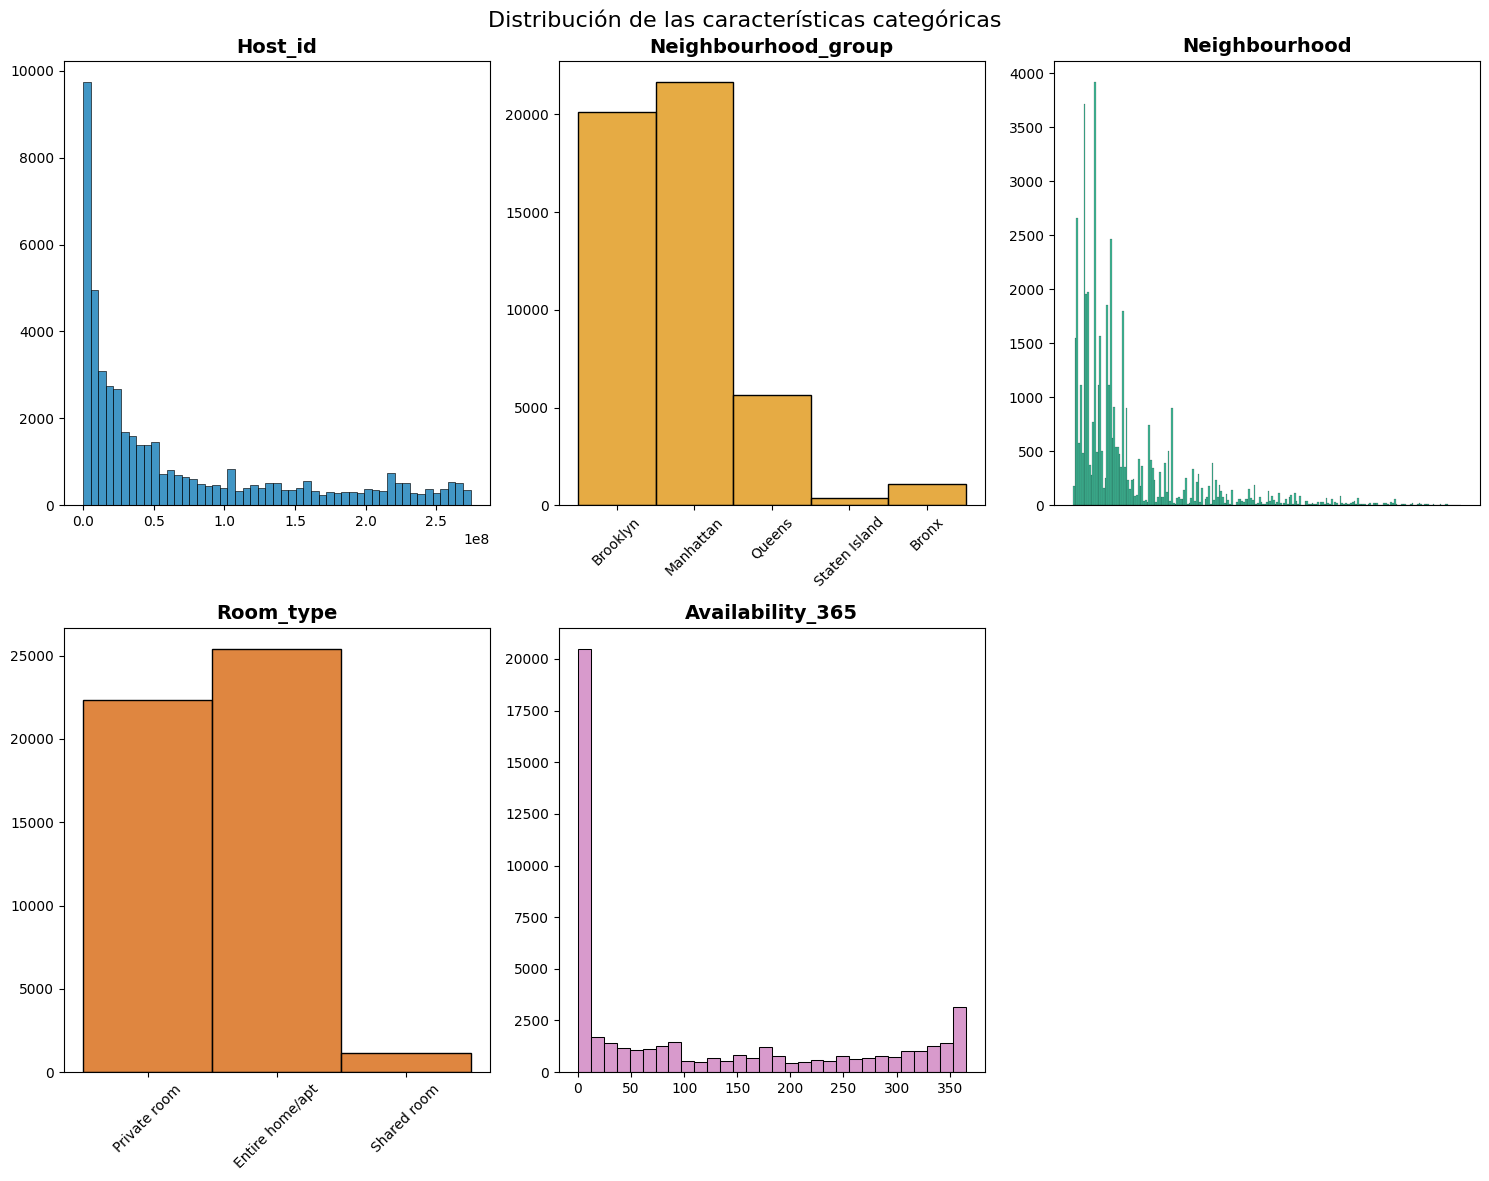

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#Analisis con histogramas para las características categóricas

fig, axis = plt.subplots(2, 3, figsize=(15, 12))
fig.suptitle("Distribución de las características categóricas", fontsize=16)

sns.histplot(ax = axis[0,0], data = total_data, x = "host_id", color=sns.color_palette("colorblind")[0]).set(xlabel = None, ylabel = None)

ax1 = sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
axis[0,1].set_xticklabels(axis[0,1].get_xticklabels(), rotation=45)

ax2 = sns.histplot(ax=axis[0, 2], data=total_data, x = "neighbourhood", color=sns.color_palette("colorblind")[2])
ax2.set_xticks([])
ax2.set(xlabel = None, ylabel = None)

ax3 = sns.histplot(ax = axis[1,0], data = total_data, x = "room_type", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
axis[1,0].set_xticklabels(axis[1,0].get_xticklabels(), rotation=45)

sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365", color=sns.color_palette("colorblind")[4]).set(xlabel = None, ylabel = None)

axis[0, 0].set_title("Host_id", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Neighbourhood_group", fontsize=14, fontweight='bold')
axis[0, 2].set_title("Neighbourhood", fontsize=14, fontweight='bold')
axis[1, 0].set_title("Room_type", fontsize=14, fontweight='bold')
axis[1, 1].set_title("Availability_365", fontsize=14, fontweight='bold')

fig.delaxes(axis[1, 2])

plt.tight_layout()

plt.show()

Se puede observar lo siguiente:

- Host_id:
- Neighbourhood_group:
- Neighbourhood:
- Room_type:
- Availability_365:

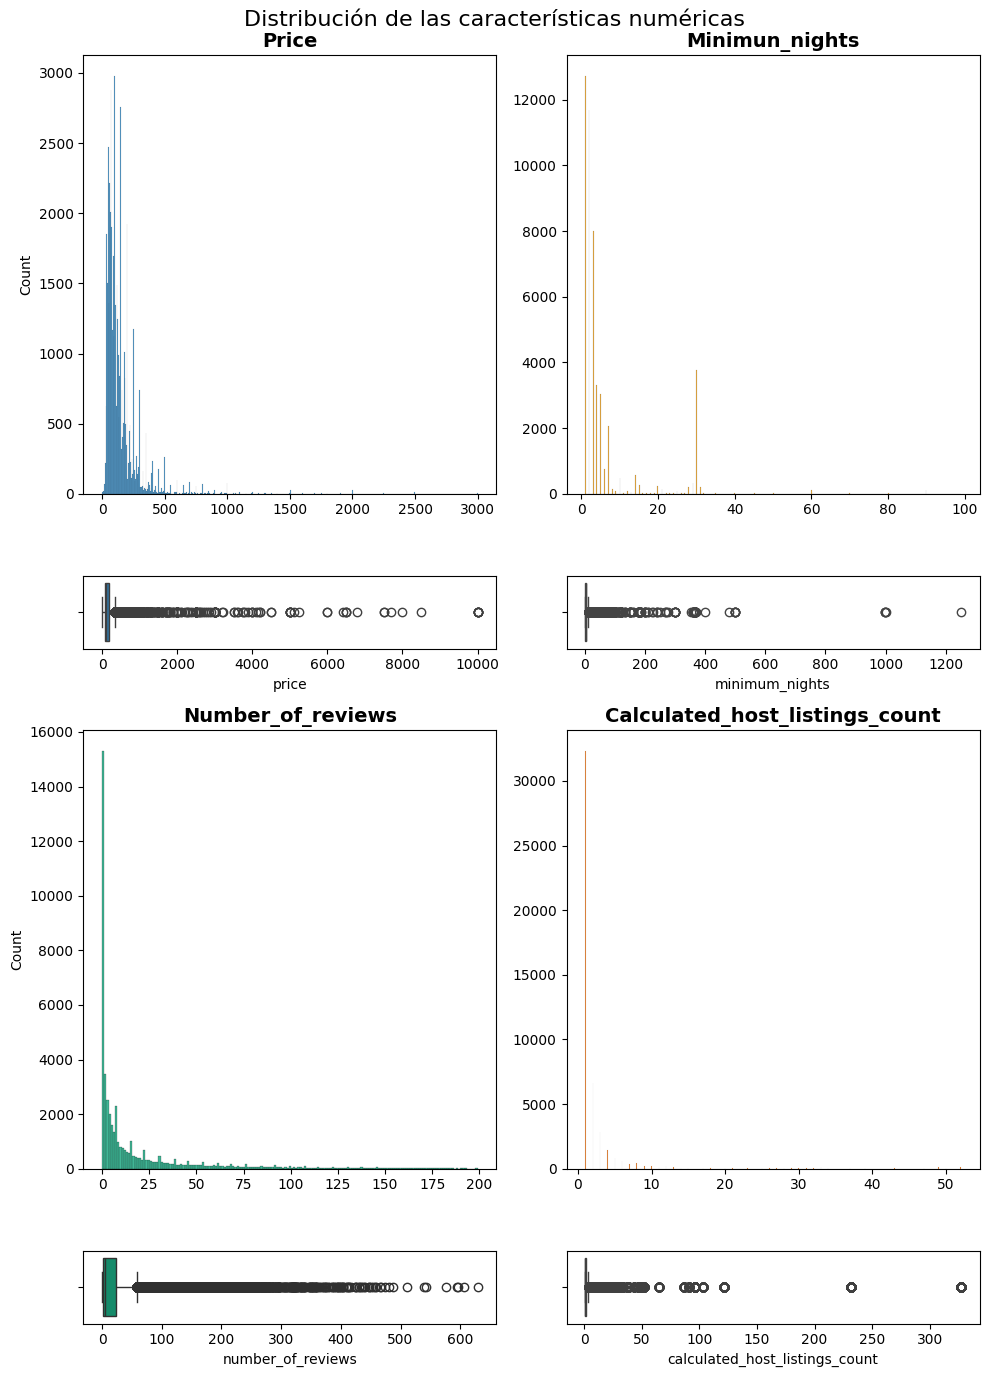

In [8]:
#Analisis con histogramas y boxplot de las características numéricas

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})
fig.suptitle("Distribución de las características numéricas", fontsize=16)

sns.histplot(ax = axis[0, 0], data = total_data[total_data["price"] < 3000], x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data[total_data["minimum_nights"] < 100], x = "minimum_nights", color=sns.color_palette("colorblind")[1]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights", color=sns.color_palette("colorblind")[1])

sns.histplot(ax = axis[2, 0], data = total_data[total_data["number_of_reviews"] < 200], x = "number_of_reviews", color=sns.color_palette("colorblind")[2]).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews", color=sns.color_palette("colorblind")[2])

sns.histplot(ax = axis[2,1], data = total_data[total_data["calculated_host_listings_count"] < 60], x = "calculated_host_listings_count", color=sns.color_palette("colorblind")[3]).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count", color=sns.color_palette("colorblind")[3])

axis[0, 0].set_title("Price", fontsize=14, fontweight='bold')
axis[0, 1].set_title("Minimun_nights", fontsize=14, fontweight='bold')
axis[2, 0].set_title("Number_of_reviews", fontsize=14, fontweight='bold')
axis[2, 1].set_title("Calculated_host_listings_count", fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

#Analisis

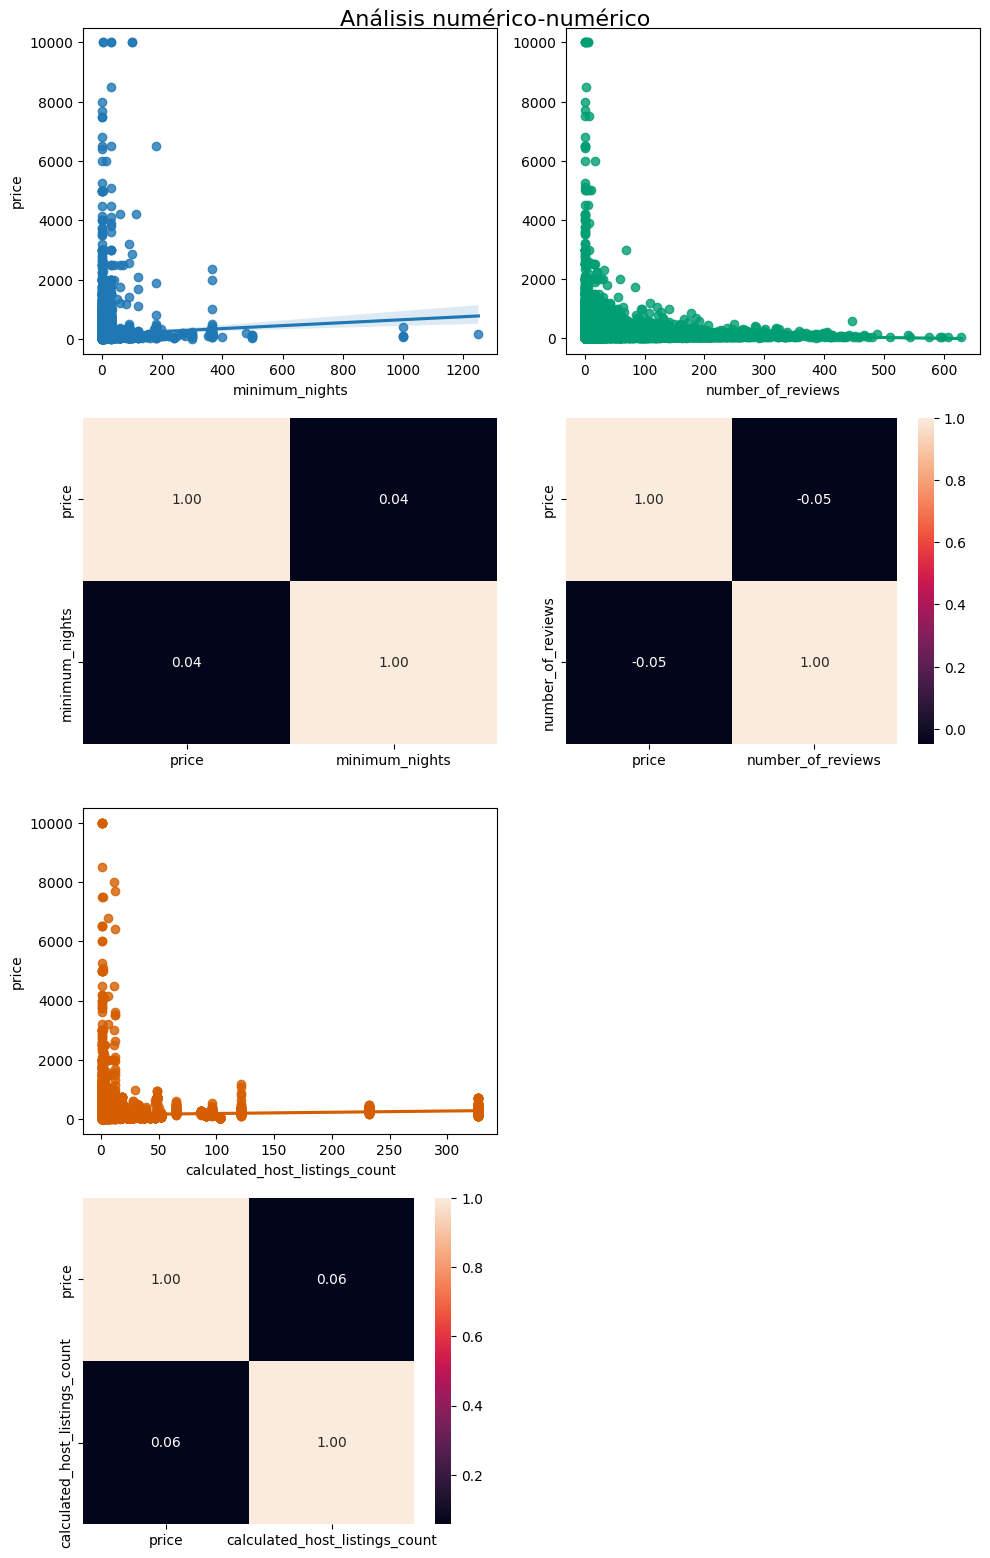

In [13]:
#Analisis de varias variables

fig, axis = plt.subplots(4, 2, figsize = (10, 16))
fig.suptitle("Análisis numérico-numérico", fontsize=16)

 
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price", color=sns.color_palette("colorblind")[2]).set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price", color=sns.color_palette("colorblind")[3])
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

# Análisis

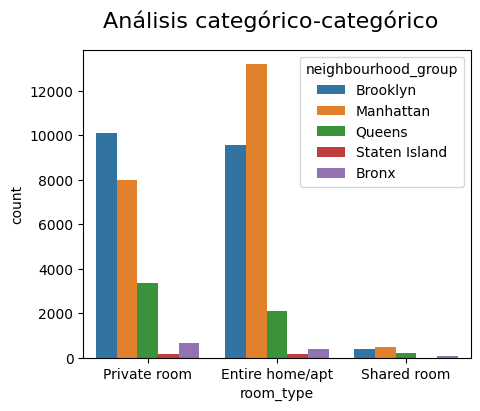

In [18]:
#Analisis de varias variables, pt.2

fig, axis = plt.subplots(figsize = (5, 4))
fig.suptitle("Análisis categórico-categórico", fontsize=16)

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

plt.show()

#Análisis

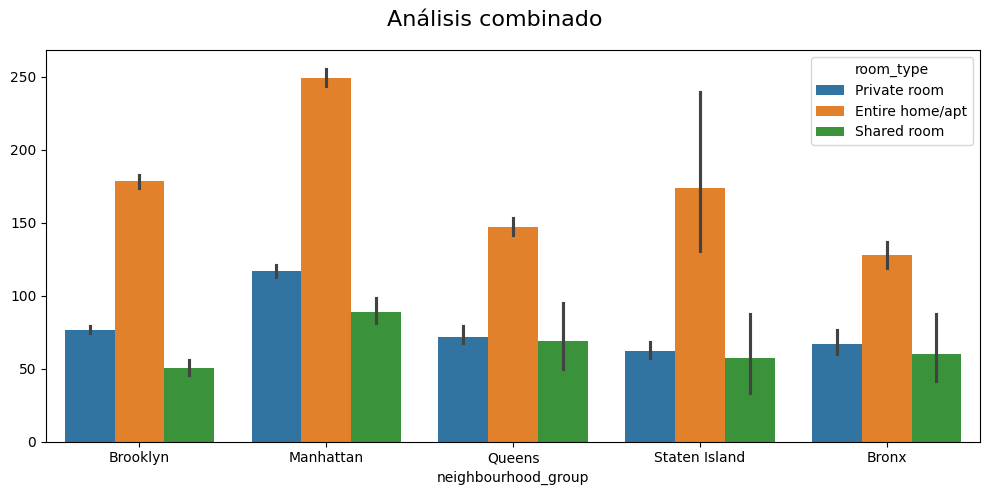

In [30]:
#Análisis combinando varias variables

fig, axis = plt.subplots(figsize = (10, 5))
fig.suptitle("Análisis combinado", fontsize=16)

sns.barplot(data = total_data, x = "neighbourhood_group", y = "price", hue = "room_type").set(ylabel = None)

plt.tight_layout()

plt.show()

#Análisis

In [55]:
import json

with open("transform_neighbourhood_group.json", "r") as f:
  neighbourhood_group_dict = json.load(f)

with open("transform_room_type.json", "r") as f:
  room_type_dict = json.load(f)

total_data["neighbourhood_group_n"] = total_data["neighbourhood_group"].apply(lambda x: neighbourhood_group_dict.get(x))
total_data["room_type_n"] = total_data["room_type"].apply(lambda x: room_type_dict.get(x))

total_data["neighbourhood_group_n"] = total_data.apply(lambda x: neighbourhood_group_dict.get(x["neighbourhood_group"]), axis = 0)
total_data["room_type_n"] = total_data.apply(lambda x: room_type_dict.get(x["room_type"]), axis = 0)


KeyError: 'neighbourhood_group'

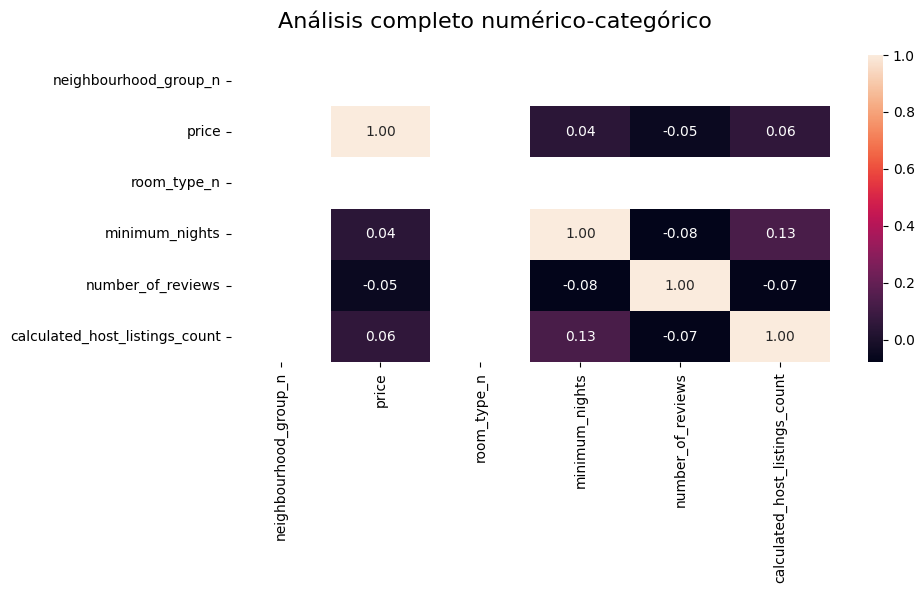

In [63]:
fig, axis = plt.subplots(figsize = (10, 6))
fig.suptitle("Análisis completo numérico-categórico", fontsize=16)

sns.heatmap(total_data[["neighbourhood_group_n", "price", "room_type_n", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

#Análisis

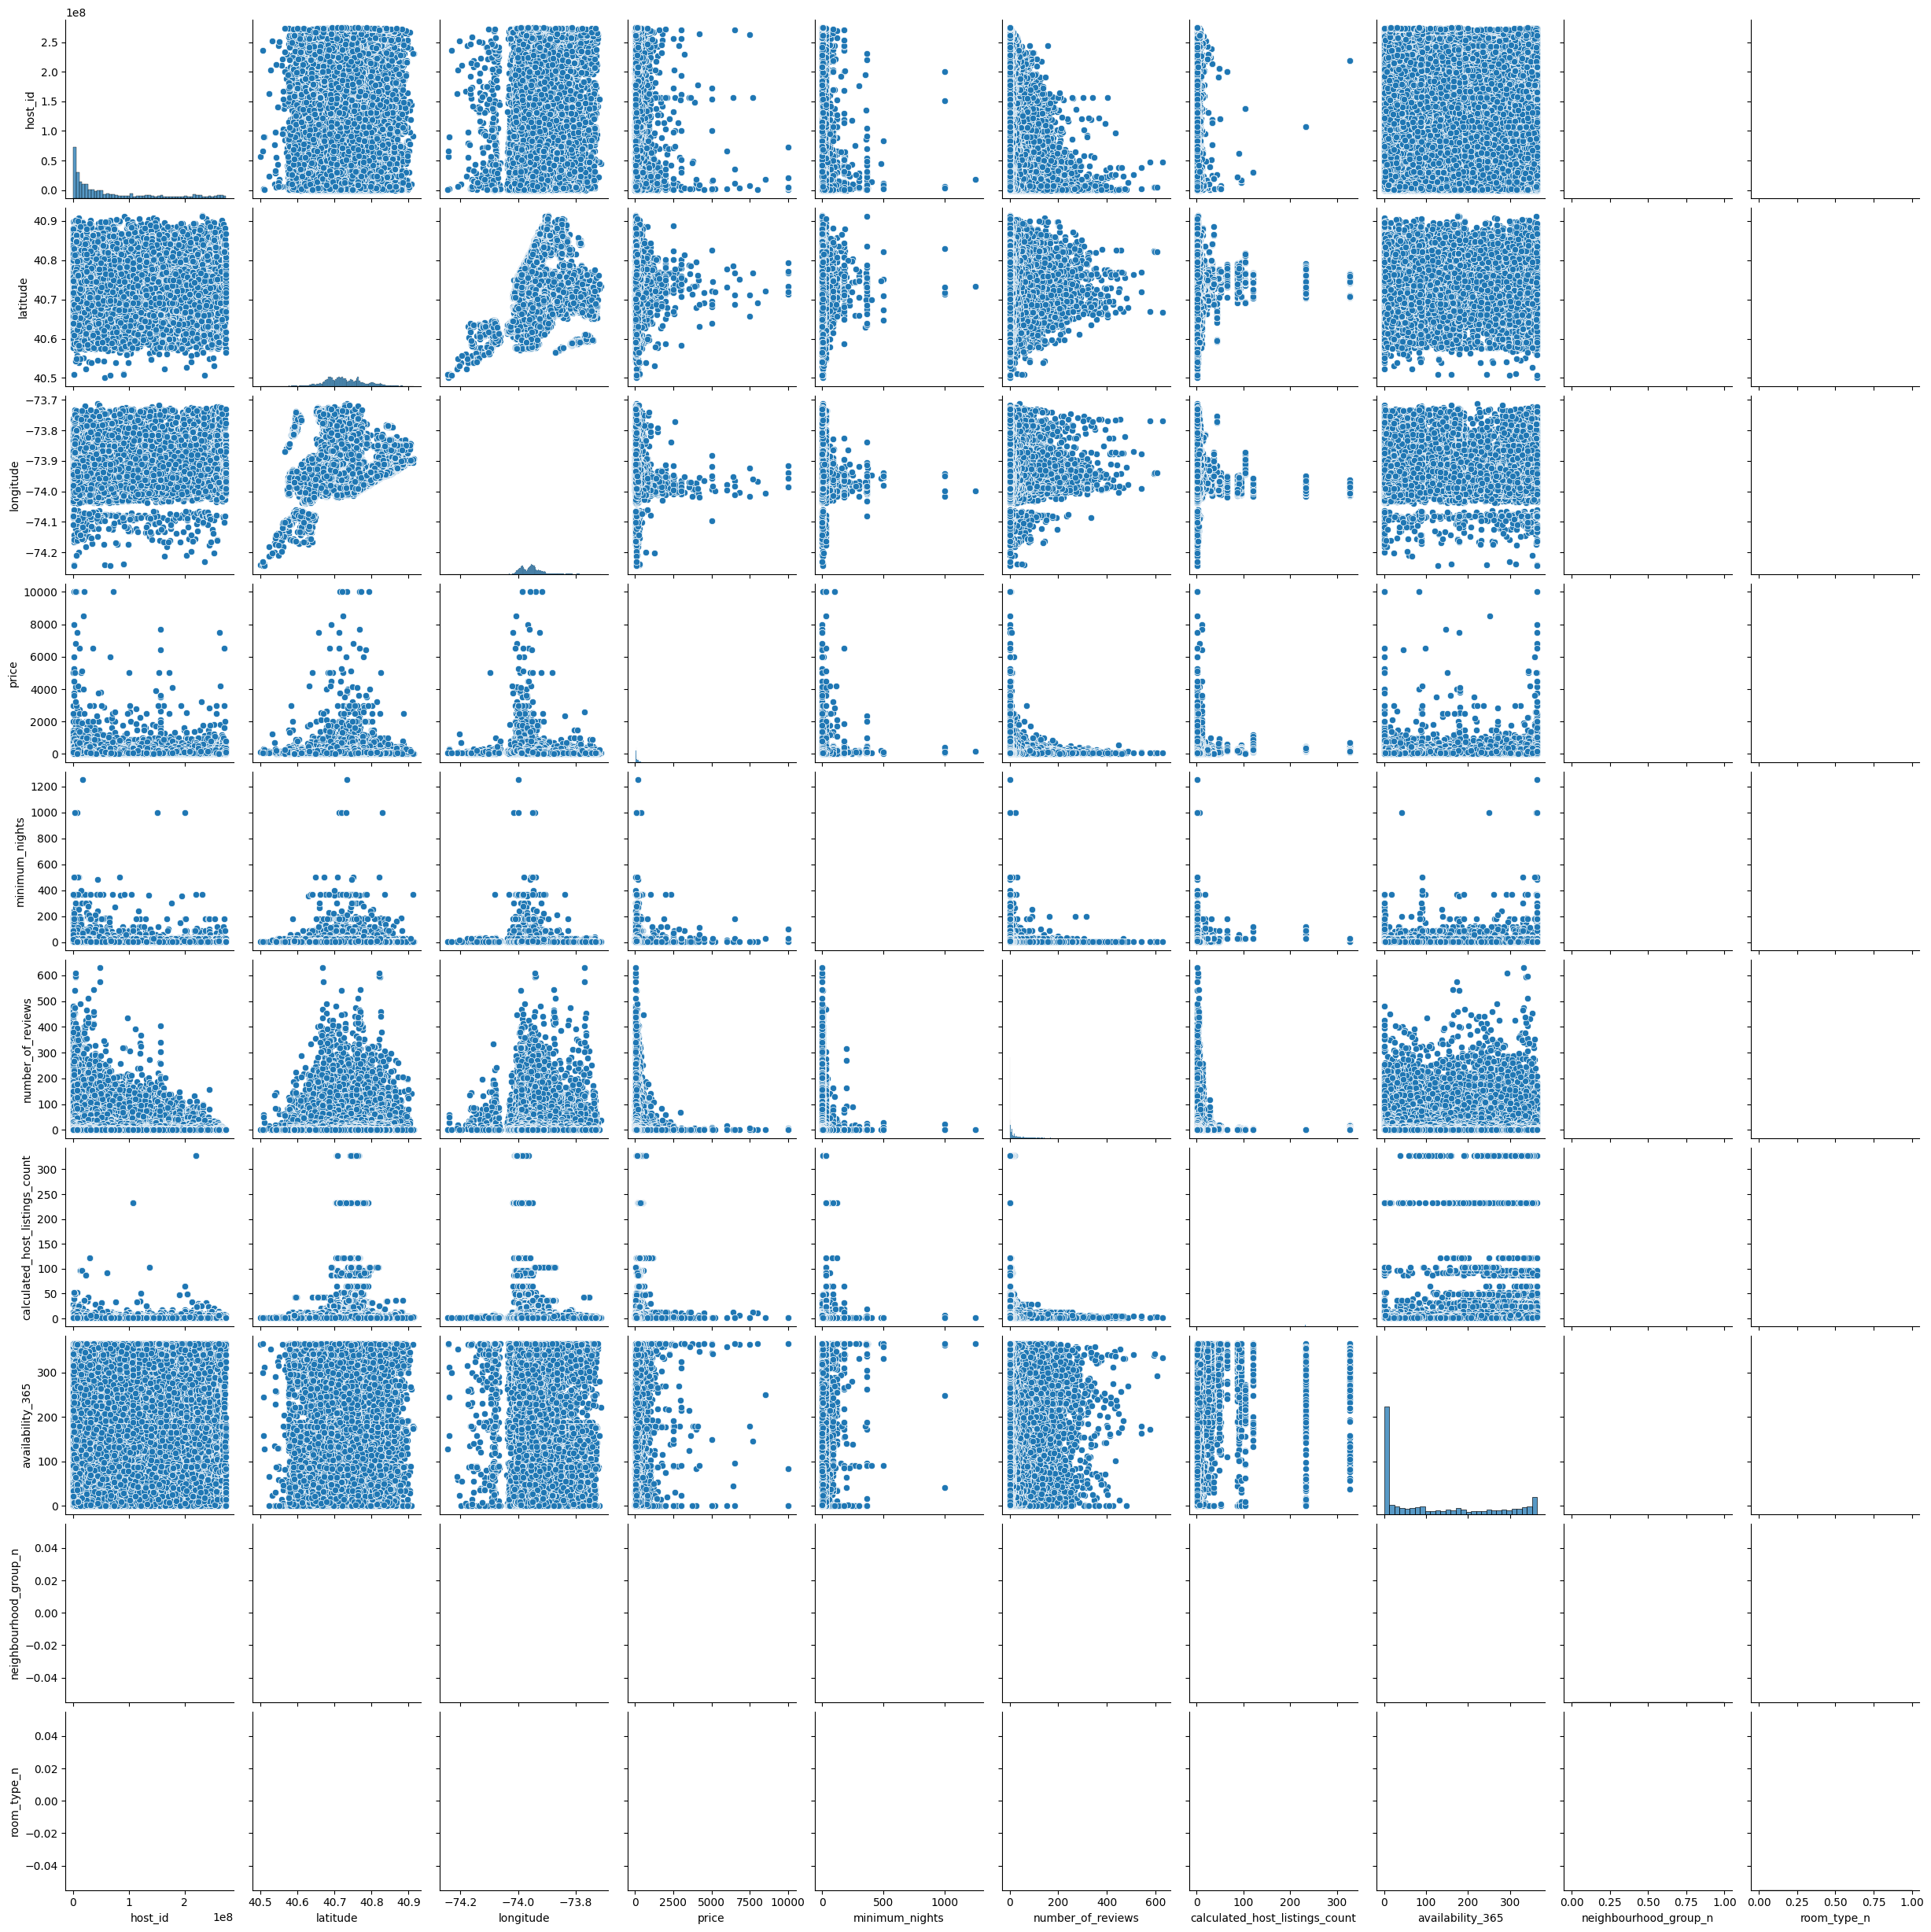

In [64]:
#Análisis de todos los datos a la vez
fig.suptitle("Análisis de todos los datos", fontsize=16)
sns.pairplot(data = total_data)

In [59]:
#Análisis de outliers
total_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


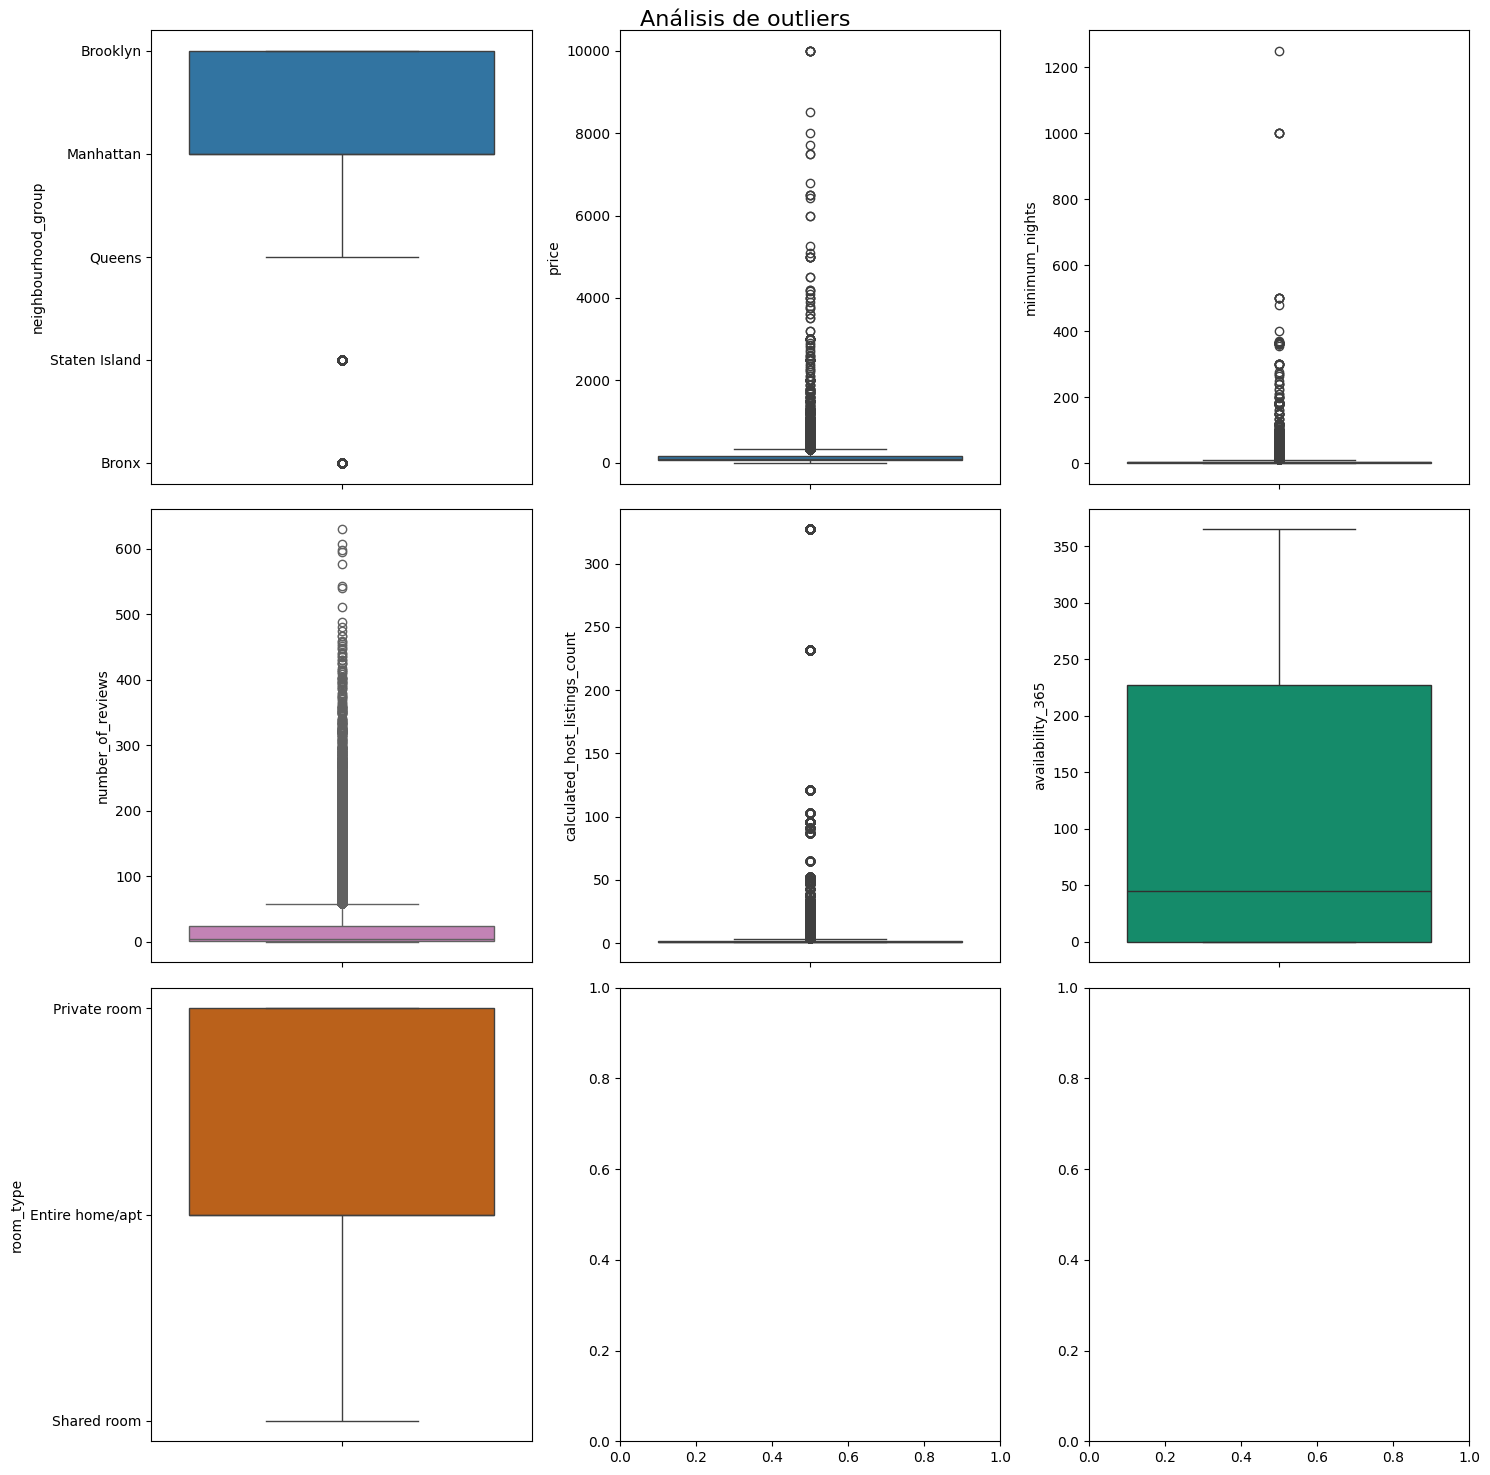

In [65]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
fig.suptitle("Análisis de outliers", fontsize=16)

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group_n")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews", color=sns.color_palette("colorblind")[4])
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365", color=sns.color_palette("colorblind")[2])
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type_n", color=sns.color_palette("colorblind")[3])

plt.tight_layout()

plt.show()